<font size="5">***IMPORT NECESSARY LIBRARIES***</font><br>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import streamlit as st
import plotly.express as px
from dash import html, dcc, Input, Output
import dash
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

#to make sure all libraries are installed, run in your terminal -> pip install -r requirements.txt


<font size="5">***DATA ACQUISITION***</font><br>

In [37]:
#Data Acquisition
df = pd.read_csv("student_data.csv")
X_features = df.drop(columns=['G1','G2','G3','school'])
Target = df.iloc[:, -1]
#Data Description
#df.info()
df.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


<font size="5">***DATA WRANGLING***</font><br>

In [38]:
#Data Cleaning

print(df.isnull().sum())

print ("\n***There are no missing/null values***\n")


# 2 Remove Duplicates
non_duplicate = df[~df.duplicated(df.columns)]
print (non_duplicate)
print ("\n***There are no duplicates***\n")

print ("***The data set is clean , we will use as it is***\n")

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

***There are no missing/null values***

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16    

<font size="5">***DATA VISUALIZATION DASHBOARD***</font><br>

Data Visualization Dashboard for all features against the target variable, G3

In [39]:
##Data Visualization for all features##
Features = X_features.iloc[:, :29]
Target = df['G3']
'''
#Scatter Plot#
for Feature_Name in Features.columns:
    plt.scatter(Features[Feature_Name], Target, alpha=0.5)
    plt.xlabel(Feature_Name)
    plt.ylabel('Target Variable')
    plt.title(f'Scatter plot of {Feature_Name} vs Target')
    plt.show()


#Bar Chart
for Feature_Name in Features.columns:
    plt.figure(figsize=(8, 6))
    feature_counts = Features[Feature_Name].value_counts()
    plt.bar(feature_counts.index, Target.groupby(Features[Feature_Name]).mean())
    plt.xlabel(Feature_Name)
    plt.ylabel('Mean Target Variable')
    plt.title(f'Bar chart of Mean Target Variable vs {Feature_Name}')
    plt.show()


#HeatMap
for Feature_Name in Features.columns:
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.concat([Features[Feature_Name], Target], axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Heatmap of Correlation between {Feature_Name} and Target Variable')
    plt.xlabel('Target Variable')
    plt.ylabel(Feature_Name)
    plt.show()
'''

#Data Visualisation Dashboard
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("DATA VISUALIZATION DASHBOARD", style={'color': 'pink', 'textAlign':'center'}),
    html.Div([
        dcc.Dropdown(
            id = 'X',
            options = [{'label': Feature_Name, 'value': Feature_Name} for Feature_Name in Features.columns],
            value = Features.columns[0], #default
            clearable = False,
            style = {'color': 'purple', 'textAlign':'center'}
        ),
        dcc.RadioItems(
            id = 'typeplot',
            options = [
                {'label':'Scatter Plot', 'value': 'scatter'},
                {'label':'Bar Plot', 'value': 'bar'}
            ],
            value = 'scatter', #default
            labelStyle = {'display': 'block', 'color': 'white', 'textAlign':'center'}
        ),
    ], style = {'width': '50%', 'margin':'auto', 'textAlign': 'center'}),
    dcc.Graph (id = 'graph')
    ])

@app.callback(
    Output('graph','figure'),
    [
        Input('X','value'),
        Input('typeplot','value')
    ]
)
def update_graph(X, typeplot):

    y_label = 'Target Variable'

    if typeplot == 'scatter':
        fig = px.scatter (Features, x=X, y=Target, title=f'Target Variable vs {X}')
        fig.update_layout(yaxis_title=y_label)
    elif typeplot == 'bar':
        fig = px.bar (Features, x=X, y=Target, title=f'Target Variable vs {X}')
        fig.update_layout(yaxis_title=y_label)
    return fig

if __name__ == '__main__':
    app.run_server (debug=True, port=8006)
    
    

<font size="5">***CORRELATION MATRIX***</font><br>

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Correlation Matrix:
              school       sex       age   address   famsize   Pstatus  \
school      1.000000 -0.083050  0.087170 -0.354520  0.022252  0.028120   
sex        -0.083050  1.000000 -0.043662  0.025503  0.098205  0.064700   
age         0.087170 -0.043662  1.000000 -0.025848 -0.002470 -0.005631   
address    -0.354520  0.025503 -0.025848  1.000000  0.046113 -0.094635   
famsize     0.022252  0.098205 -0.002470  0.046113  1.000000 -0.239608   
Pstatus     0.028120  0.064700 -0.005631 -0.094635 -0.239608  1.000000   
Medu       -0.254787  0.119127 -0.107832  0.190320 -0.014325 -0.057174   
Fedu       -0.209806  0.083913 -0.121050  0.141493 -0.039538 -0.031856   
Mjob       -0.206829  0.149635 -0.071770  0.159761  0.019600 -0.028874   
Fjob       -0.081872  0.080466 -0.050846 -0.006535 -0.059443 

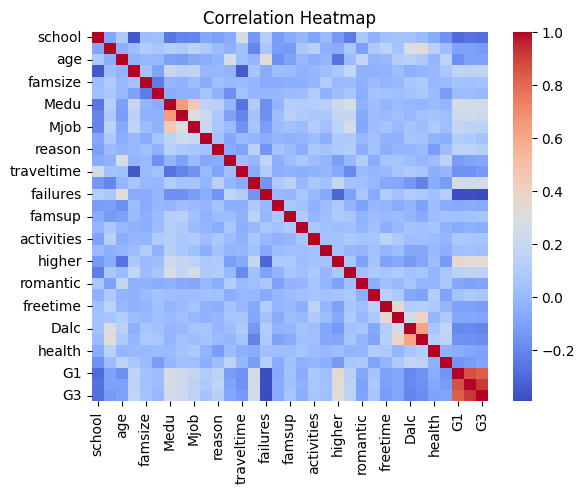

In [40]:

#Detect non-numeric datatypes
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
print (non_numeric_columns)

# Convert non-numeric columns into numerical values using Label Encoding
label_encoders = LabelEncoder()
for col in non_numeric_columns:
    df[col] = label_encoders.fit_transform(df[col])
    
#DataFrame after converting non-numeric to numeric
#print(df)    

#Finding correlation matrix of all variables
correlation_matrix = df.corr()                       

print("Correlation Matrix:")
print(correlation_matrix)


#HeatMap for all variables
sns.heatmap(correlation_matrix, cmap='coolwarm')     
plt.title('Correlation Heatmap')
plt.show()

**Defining the contributing Dataset according to Correlation Matrix**

In [41]:
'''# Calculate the correlation matrix
correlation_matrix = df.corr()

# Select the last column as the target variable
G3_Corr = correlation_matrix.columns[-1]

# Filter features based on correlation threshold
Correlation_Relevant = [feature for feature in correlation_matrix.columns[:-1] if abs(correlation_matrix.loc[feature, G3_Corr]) > 0.2]

# Print relevant features
print("Features contributing to our target according to the Correlation matrix:", Correlation_Relevant)

# Create a new dataset with the relevant features and the target variable
Relevant_DataSet = df[Correlation_Relevant]
Relevant_DataSet['G3'] = df[G3_Corr]  # Ensure the target variable is included'''


#Deciding which features attribute to our Target "G3"
G3_Corr = correlation_matrix.columns[-1]

Correlation_Relevant = []
for feature in correlation_matrix.columns[:-1]:  # Exclude the last variable
    if abs(correlation_matrix.loc[feature,G3_Corr]) > 0.2:
        Correlation_Relevant.append(feature)
        
print("Features contributing to our target according to the Correlation matrix:", Correlation_Relevant)
Relevant_DataSet_corr =df[Correlation_Relevant]
Relevant_DataSet_corr['G3']=Target
#Our New DataSet "Relevant_DataSet"
#print(Relevant_DataSet)

Features contributing to our target according to the Correlation matrix: ['school', 'Medu', 'Fedu', 'studytime', 'failures', 'higher', 'Dalc', 'G1', 'G2']


<font size="5">***HYPOTHESIS TESTING***</font><br>

In [42]:
# Define predictor variables (X) and target variable (y)
X = Relevant_DataSet_corr[Correlation_Relevant]
y = Relevant_DataSet_corr['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Use statsmodels to get detailed statistical information
# Add a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the model using statsmodels
sm_model = sm.OLS(y_train, X_train_sm).fit()
print(sm_model.summary()) 

Mean Squared Error: 1.4095853785537962
R-squared: 0.8554525806560571
                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     315.1
Date:                Sat, 18 May 2024   Prob (F-statistic):          1.08e-201
Time:                        10:35:57   Log-Likelihood:                -858.71
No. Observations:                 519   AIC:                             1737.
Df Residuals:                     509   BIC:                             1780.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

**Defining the contributing Dataset according to hypothesis testing**

sex significantly affects the target variable with a p-value of 0.004166499924005577 and a coefficient of 5.058562076165618e-15.
age significantly affects the target variable with a p-value of 0.0790998451406891 and a coefficient of -7.251144129583054e-16.
Pstatus significantly affects the target variable with a p-value of 0.16979478660995434 and a coefficient of 3.3200438925851117e-15.
Medu significantly affects the target variable with a p-value of 0.18073041559352113 and a coefficient of -1.3027773304585821e-15.
Mjob significantly affects the target variable with a p-value of 0.028134430762484633 and a coefficient of -1.5417354892743873e-15.
internet significantly affects the target variable with a p-value of 0.1346068492545133 and a coefficient of 2.8852788214184244e-15.


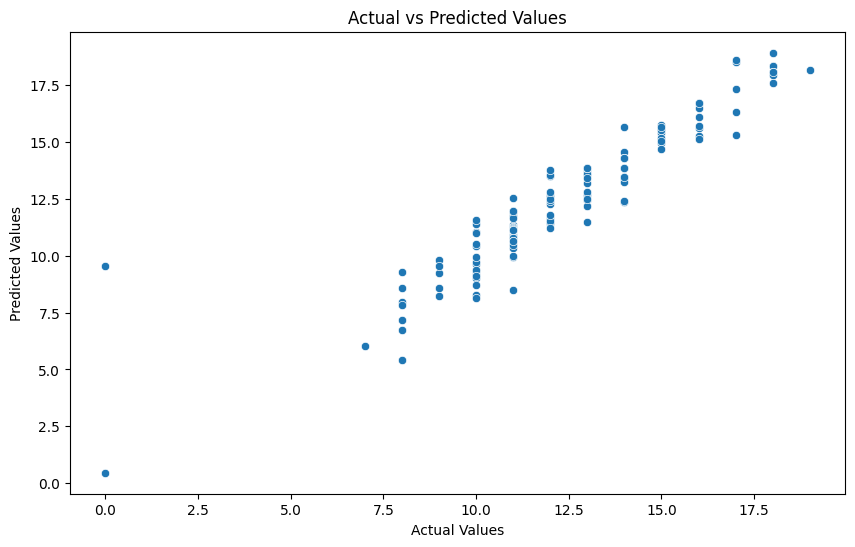

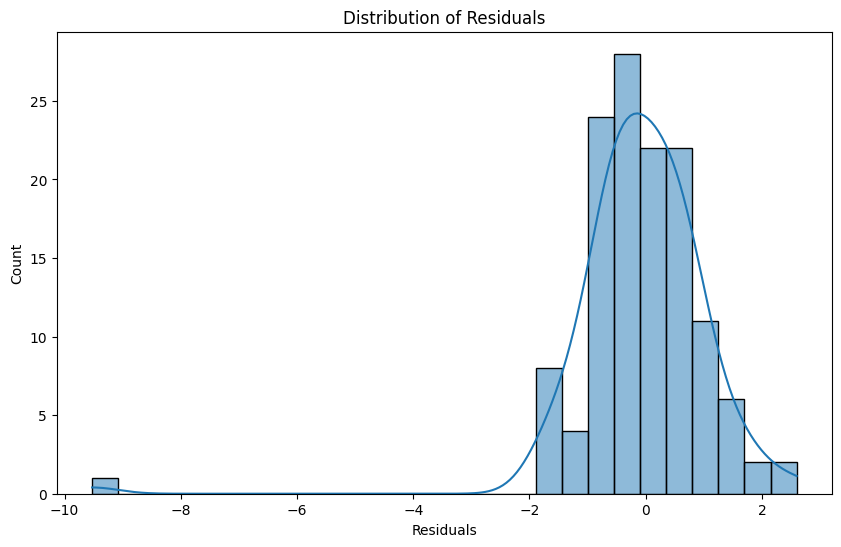

In [43]:
# Formulate Hypotheses based on p-values and coefficients from statsmodels summary
model = sm.OLS(Target, df).fit()
p_values = model.pvalues
coefficients = model.params

Relevant_DataSet_hypo = X_features

for feature in X_features.columns:
    if p_values[feature] <= 0.2:
        print(f"{feature} significantly affects the target variable with a p-value of {p_values[feature]} and a coefficient of {coefficients[feature]}.")
    else:
        Relevant_DataSet_hypo = Relevant_DataSet_hypo.drop(columns=[feature])

#print (Relevant_DataSet_hypo)

# Additional Step: Plotting (Optional)
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


In [44]:
def adj_r2(X, y, model):
        r2 = model.score(X, y)
        n = X.shape[0]
        p = X.shape[1]
        adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

        return adjusted_r2

<font size="5">***Linear Regression***</font><br>

In [50]:
def linear_model_creator(df, feature_variables, target_variable, test_size=0.2, normalize=False):
    #extracting the wanted features (X) and target variable (Y)
    X = np.array(df[feature_variables])
    Y = np.array(df[target_variable]).reshape(-1, 1)  #reshaping Y to 2D array for scaling

    #optionally normalize the data
    if normalize:
        scaler_X = StandardScaler()
        scaler_Y = StandardScaler()
        X = scaler_X.fit_transform(X)
        Y = scaler_Y.fit_transform(Y)
   
    #dividing the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=0)
       
    #creating the Linear model
    lm = LinearRegression()
    lm.fit(X_train, Y_train)

    #creating predictions with the model
    predictions = lm.predict(X_test)
   
    #unnormalize the predictions if data was normalized
    if normalize:
        predictions = scaler_Y.inverse_transform(predictions)
        Y_test = scaler_Y.inverse_transform(Y_test)
   
    #creating the DF with the used features, the target variable, and the predicted data
    dictionary = {}

    for feature in feature_variables:
        dictionary[feature] = X_test[:, feature_variables.index(feature)]

    lm_results = pd.DataFrame.from_dict(dictionary)
    lm_results["Y_target"] = Y_test.flatten()  #flattening Y_test to 1D array
    lm_results["Y_predicted"] = predictions.flatten()  #flattening predictions to 1D array
   
    #plotting the actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(lm_results["Y_target"], lm_results["Y_predicted"], color='blue')
    plt.title(f'Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
    
    #evaluating the model
    print("Target:", target_variable)
    print("Features:", feature_variables)
    print("The accuracy (R²) of the Model train is:", adj_r2( X_train,Y_train, lm))
    print("The accuracy (R²) of the Model test is:", adj_r2( X_test,Y_test, lm))
    print('The accuracy (MSE) of the train Model is: %.2f' % mean_squared_error(Y_train, lm.predict(X_train)))
    print('The accuracy (MSE) of the test Model is: %.2f' % mean_squared_error(Y_test, predictions))
    print("The intercept (alpha) is:", lm.intercept_)
    print("The coefficients (betas) are:", lm.coef_)
    
   
    return lm_results

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.083050,0.087170,-0.354520,0.022252,0.028120,-0.254787,-0.209806,-0.206829,-0.081872,...,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163933,-0.292626,-0.269776,-0.284294
sex,-0.083050,1.000000,-0.043662,0.025503,0.098205,0.064700,0.119127,0.083913,0.149635,0.080466,...,0.083473,0.146305,0.058178,0.282696,0.320785,0.139547,0.021336,-0.104109,-0.104005,-0.129077
age,0.087170,-0.043662,1.000000,-0.025848,-0.002470,-0.005631,-0.107832,-0.121050,-0.071770,-0.050846,...,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
address,-0.354520,0.025503,-0.025848,1.000000,0.046113,-0.094635,0.190320,0.141493,0.159761,-0.006535,...,-0.033897,-0.036647,0.015475,-0.047304,-0.012416,0.003787,0.073653,0.157127,0.154600,0.167637
famsize,0.022252,0.098205,-0.002470,0.046113,1.000000,-0.239608,-0.014325,-0.039538,0.019600,-0.059443,...,0.004641,-0.021257,-0.004312,0.060482,0.081958,0.002448,0.004645,0.047230,0.038891,0.045016
Pstatus,0.028120,0.064700,-0.005631,-0.094635,-0.239608,1.000000,-0.057174,-0.031856,-0.028874,0.054306,...,0.051303,0.037585,0.031086,0.041513,0.070976,0.012638,-0.117492,0.015251,0.018689,-0.000754
Medu,-0.254787,0.119127,-0.107832,0.190320,-0.014325,-0.057174,1.000000,0.647477,0.459337,0.152582,...,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.209806,0.083913,-0.121050,0.141493,-0.039538,-0.031856,0.647477,1.000000,0.290703,0.211604,...,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
Mjob,-0.206829,0.149635,-0.071770,0.159761,0.019600,-0.028874,0.459337,0.290703,1.000000,0.202651,...,0.025049,0.053927,0.003182,0.049576,0.025657,0.081525,0.028519,0.181551,0.153875,0.148252
Fjob,-0.081872,0.080466,-0.050846,-0.006535,-0.059443,0.054306,0.152582,0.211604,0.202651,1.000000,...,0.039500,-0.037952,-0.031913,0.055389,0.044607,-0.025069,-0.047477,0.109847,0.086343,0.052953


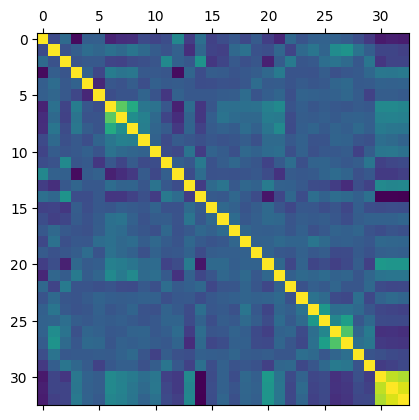

In [46]:
plt.matshow(df.corr())
df.corr()


We will first try to predict our target variable using features with correlation threshold > 0.4

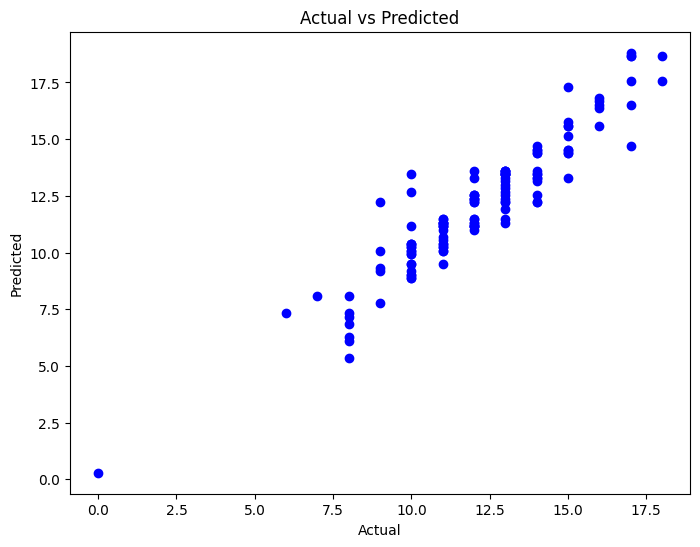

Target: G3
Features: ['G1', 'G2']
The accuracy (R²) of the Model train is: 0.8441891413183051
The accuracy (R²) of the Model test is: 0.8590559807024517
The accuracy (MSE) of the train Model is: 1.74
The accuracy (MSE) of the test Model is: 0.99
The intercept (alpha) is: [-0.48074403]
The coefficients (betas) are: [[0.153563   0.91827126]]


,G1,G2,Y_target,Y_predicted
0,9,7,8,7.329222
1,14,14,15,14.524936
2,15,16,16,16.515041
3,10,10,10,10.237599
4,9,9,10,9.165764
...,...,...,...,...
125,12,15,15,15.136081
126,15,14,14,14.678499
127,14,17,15,17.279749
128,8,13,10,12.685286


In [52]:
linear_model_creator(df,['G1', 'G2'], 'G3', test_size = 0.2)

The model works really well but let's try to increase the accuracy further by including more features.

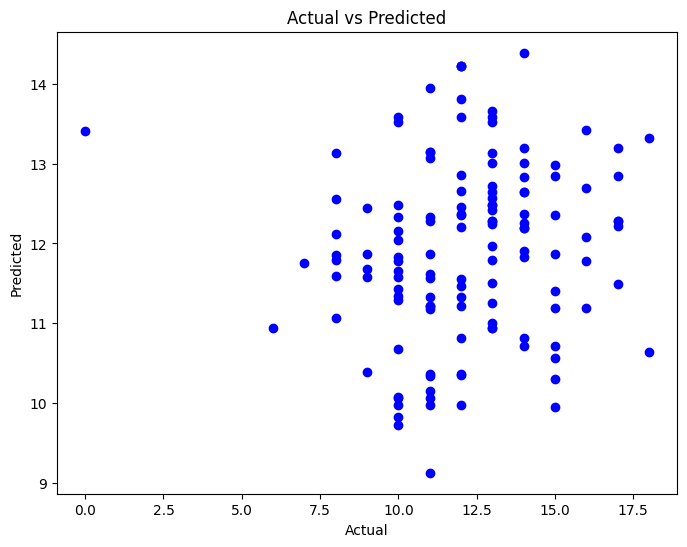

Target: G3
Features: ['Medu', 'Mjob', 'internet', 'age', 'sex', 'Pstatus']
The accuracy (R²) of the Model train is: 0.11744624060960818
The accuracy (R²) of the Model test is: -0.13781963670429676
The accuracy (MSE) of the train Model is: 9.80
The accuracy (MSE) of the test Model is: 7.71
The intercept (alpha) is: [14.48437264]
The coefficients (betas) are: [[ 0.64732211  0.16225278  0.86589128 -0.28771265 -1.24385292  0.1134543 ]]


,Medu,Mjob,internet,age,sex,Pstatus,Y_target,Y_predicted
0,2,1,1,16,1,1,8,11.073360
1,0,0,1,17,0,1,15,10.572603
2,3,2,1,18,1,0,16,11.194055
3,2,0,1,18,0,1,10,11.579535
4,2,0,1,19,0,1,10,11.291822
...,...,...,...,...,...,...,...,...
125,2,3,1,17,0,1,15,12.354006
126,4,4,0,17,0,0,14,12.831557
127,2,0,0,18,0,1,15,10.713643
128,2,2,0,17,1,1,10,10.082009


In [53]:
#linear regression for features contributing from hypothesis testing pov
linear_model_creator(df,[ 'Medu', 'Mjob', 'internet', 'age', 'sex', 'Pstatus'], 'G3', test_size = 0.2)

#This shows that even though we used more features, the model accuracy changed by a really small percentage as the features we added have a weak correlation with the target variable. However, we will use this model as it provides higher accuracy.# (not yet sure of this comment)